In [2]:
import pandas as pd
import numpy as np
import json
import sys 
sys.path.insert(1, "../")
from workloads.util import use_results, use_dataset, read_config, log_dataset

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [8]:
dataset_dir = use_dataset("wikipedia", download=False)
results_dir = use_results("wikipedia", download=False)

/data/wooders/ralf-vldb//datasets/wikipedia


In [10]:
pageviews_df = pd.read_csv(f"{dataset_dir}/pageviews.csv")
pageviews_df

,Unnamed: 0,title,edit_count,2021080500,2021080600,2021080700,2021080800,2021080900,2021081000,2021081100,...,2021082800,2021082900,2021083000,2021083100,2021090100,2021090200,2021090300,2021090400,weights,doc_id
0,0,Deaths in 2021,1877,38,35,36,31,349,66,56,...,69,50,63,68,50,52,39,46,0.028511,65984422
1,1,2021 Atlantic hurricane season,1438,11,5,16,8,9,7,14,...,8,20,2,8,5,12,11,5,0.003805,57798785
2,2,Neeraj Chopra,1156,3,7,3,2,4,3,4,...,5,6,0,4,9,2,1,3,0.002170,51150040
3,3,Fall of Kabul (2021),1009,18,9,12,12,16,10,12,...,11,16,9,9,20,15,5,10,0.004876,68481047
4,4,Great Britain at the 2020 Summer Paralympics,989,13,5,6,4,16,8,9,...,3,8,6,8,10,7,4,7,0.003397,60043578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,List of fungi of South Africa,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,68354495
212,212,Mister Supranational 2021,203,8,9,7,13,21,4,9,...,10,7,6,1,13,5,5,6,0.003467,67918135
213,213,2021–22 FC Barcelona season,202,19,29,29,27,28,27,23,...,21,26,29,16,27,20,43,18,0.012698,67089631
214,214,Hamid Karzai International Airport,201,14,26,15,17,26,14,17,...,19,10,25,13,26,14,22,7,0.007258,487602


In [49]:
index = pageviews_df.index.tolist()
print(index)
edits = pageviews_df.edit_count.tolist()
queries = pageviews_df.loc[:, '2021080500':'2021090400'].sum(axis=1).tolist()

data = []
for i in index: 
    for j in range(edits[i]):
        data.append({"doc_id": i, "value": 1, "Event Type": "edit"})
for i in index: 
    for j in range(queries[i]):
        data.append({"doc_id": i, "value": 1, "Event Type": "query"})
df = pd.DataFrame(data)
df

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215]


,doc_id,value,Event Type
0,0,1,edit
1,0,1,edit
2,0,1,edit
3,0,1,edit
4,0,1,edit
...,...,...,...
144525,215,1,query
144526,215,1,query
144527,215,1,query
144528,215,1,query


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

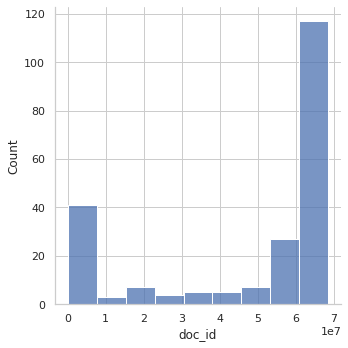

In [13]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 5
sns.displot(pageviews_df, x="doc_id")

<bound method Axes.legend of <AxesSubplot:xlabel='Article ID', ylabel='Count'>>


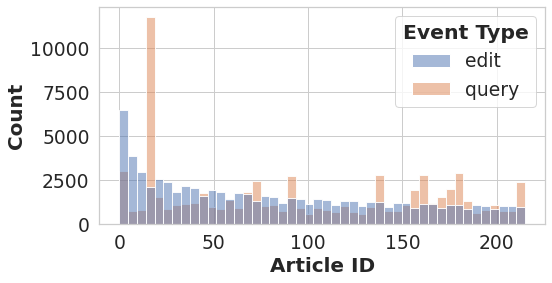

In [56]:
sns.set_theme(style="whitegrid", font_scale=1.7)

fig, axes = plt.subplots(1, 1, figsize=(8,4))



g = sns.histplot(df, x="doc_id", hue="Event Type", log_scale=(False, False), ax=axes, legend=True)
#g.set(title="Event Distribution (Wikipedia)", xlabel="Key ID",  ylabel="Count")
#plt.legend(loc='upper right')
#plt.legend(np.flip(df['Event Type'].unique()), loc='upper right', title="Event Type")
axes.set_xlabel("Article ID", fontsize=20, fontweight="bold")
axes.set_ylabel("Count", fontsize=20, fontweight="bold")
#axes.set_title("Number of Edits and Queries", fontsize=24)

print(g.legend)
#handles, labels = g.get_legend_handles_labels()
#leg = fig.legend(handles, labels, fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.3))

plt.setp(axes.get_legend().get_title(), fontweight="bold")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)


fig.savefig('updates_vs_queries.pdf', dpi=300, bbox_inches = "tight")

In [15]:
constants = [0.01, 0.25, 1.0, 10.0]
key_policies = ["random", "weighted_random", "round_robin", "weighted_round_robin"]

In [95]:

data = []
for c in constants: 
    for p in key_policies:
        if "random" in p: continue 
            
        res = json.load(open(f"{results_dir}/predictions/plan-{p}_lifo-always_process-{c}-100.json"))
        print(p)
        print(res)
        res["updates"] = int(10/c)
        res["policy"] = p
        data.append(res)
       
results_df = pd.DataFrame(data)
        
# optimal: {"top1": 0.2473573934129058, "top5": 0.5067997583005706, "top10": 0.6039346783749637, "top100": 0.6039346783749637}

round_robin
{'top1': 0.24825199519740096, 'top5': 0.5089891784573612, 'top10': 0.60611625114768, 'top100': 0.60611625114768}
weighted_round_robin
{'top1': 0.24800872629109086, 'top5': 0.5088165360077218, 'top10': 0.6060534720750838, 'top100': 0.6060534720750838}
round_robin
{'top1': 0.15889383274085583, 'top5': 0.32404987797317764, 'top10': 0.38321130651097457, 'top100': 0.38321130651097457}
weighted_round_robin
{'top1': 0.1695427329299778, 'top5': 0.34221657210568857, 'top10': 0.40124459511421867, 'top100': 0.40124459511421867}
round_robin
{'top1': 0.09624031828989807, 'top5': 0.17375677817799437, 'top10': 0.1975657414600843, 'top100': 0.1975657414600843}
weighted_round_robin
{'top1': 0.1257150928737905, 'top5': 0.2634759203019673, 'top10': 0.32469336346728817, 'top100': 0.32469336346728817}
round_robin
{'top1': 0.06499988228923888, 'top5': 0.11364581616718067, 'top10': 0.12400436314554543, 'top100': 0.12400436314554543}
weighted_round_robin
{'top1': 0.08138522023683405, 'top5': 0.169

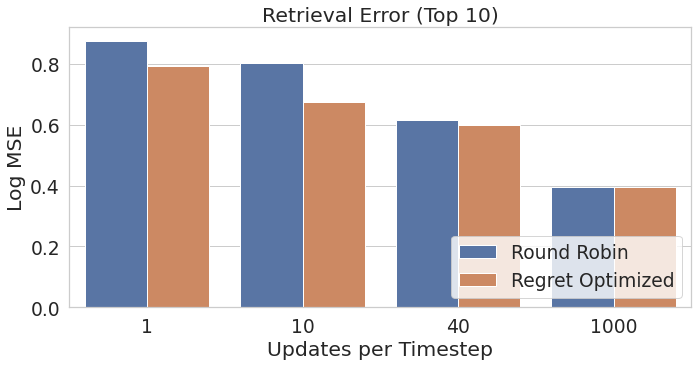

In [92]:
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.7)
plot_df = results_df
plot_df.policy = plot_df.policy.map({"round_robin": "Round Robin", "weighted_round_robin": "Regret Optimized"})
plot_df["error"] = 1 - plot_df["top10"]
sns.barplot(x="updates", y="error", hue="policy", data=plot_df, log=False)
ax.set(title="Retrieval Error (Top 10)", xlabel="Updates per Timestep",  ylabel="Log MSE")
plt.legend(loc='lower right')
plt.savefig('/data/wooders/ralf-vldb/plots/wiki_error_top10.pdf')

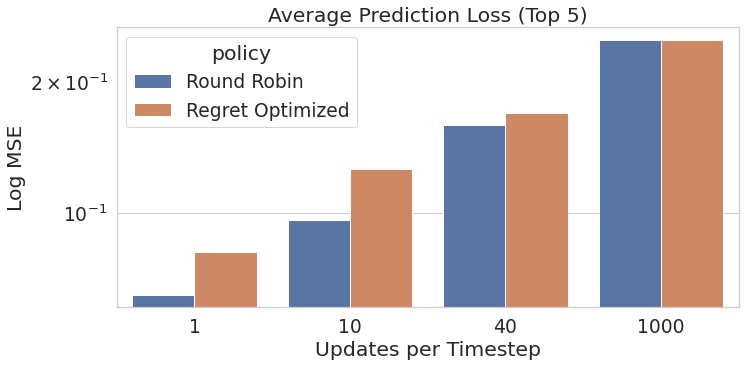

In [71]:
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.7)
plot_df = results_df
plot_df.policy = plot_df.policy.map({"round_robin": "Round Robin", "weighted_round_robin": "Regret Optimized"})

sns.barplot(x="updates", y="top1", hue="policy", data=plot_df, log=True)
ax.set(title="Average Prediction Loss (Top 5)", xlabel="Updates per Timestep",  ylabel="Log MSE")
plt.savefig('/data/wooders/ralf-vldb/plots/wiki_error_top5.pdf')

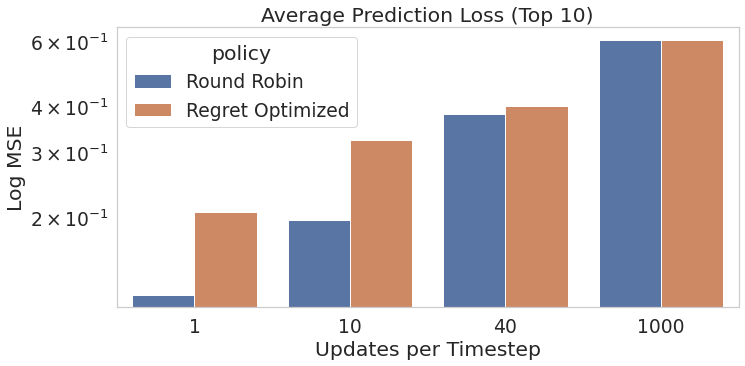

In [73]:
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
plt.tight_layout()
sns.set_theme(style="whitegrid", font_scale=1.7)
plot_df = results_df
plot_df.policy = plot_df.policy.map({"round_robin": "Round Robin", "weighted_round_robin": "Regret Optimized"})

sns.barplot(x="updates", y="top10", hue="policy", data=plot_df, log=True)
ax.set(title="Average Prediction Loss (Top 10)", xlabel="Updates per Timestep",  ylabel="Log MSE")
plt.savefig('/data/wooders/ralf-vldb/plots/wiki_error_top10.pdf')

[Text(0.5, 1.0, 'Prediction Accuracy per Policy (Information Retrieval)'),
 Text(0.5, 0, 'Updates per Timestep'),
 Text(0, 0.5, 'MSE')]

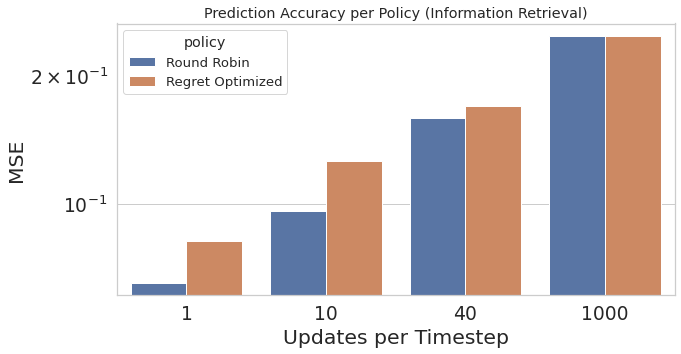

In [52]:
f, ax = plt.subplots(ncols=1, figsize=(10, 5))

sns.set_theme(style="whitegrid", font_scale=1.7)
plot_df = results_df
plot_df.policy = plot_df.policy.map({"round_robin": "Round Robin", "weighted_round_robin": "Regret Optimized"})

g = sns.barplot(x="updates", y="top1", hue="policy", data=results_df, log=True)


g.set(title="Prediction Accuracy per Policy (Information Retrieval)", xlabel="Updates per Timestep",  ylabel="MSE")


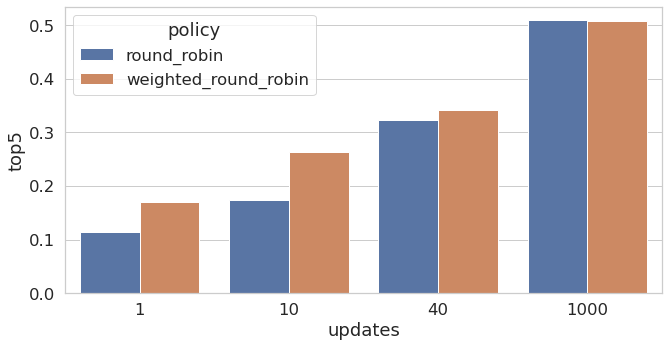

In [226]:
ax = sns.barplot(x="updates", y="top5", hue="policy", data=results_df)

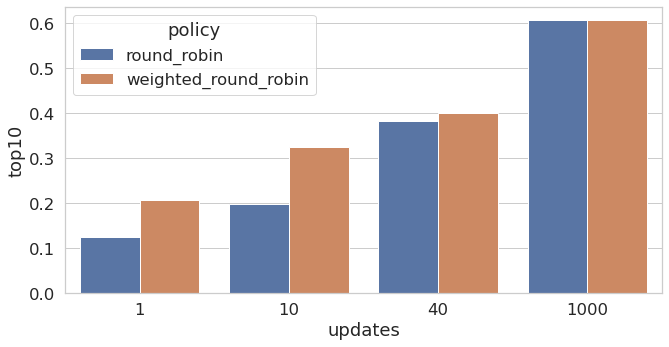

In [227]:
ax = sns.barplot(x="updates", y="top10", hue="policy", data=results_df)